In [3]:
import pandas as pd

/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('train_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8546 non-null   object
 1   Date_of_Journey  8546 non-null   object
 2   Source           8546 non-null   object
 3   Destination      8546 non-null   object
 4   Route            8545 non-null   object
 5   Dep_Time         8546 non-null   object
 6   Arrival_Time     8546 non-null   object
 7   Total_Stops      8545 non-null   object
 8   Additional_Info  8546 non-null   object
dtypes: object(9)
memory usage: 601.0+ KB


In [6]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM ? VNS ? DEL ? HYD,06:30,16:35,2 stops,No info
1,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:30,12:35 10 May,1 stop,In-flight meal not included
2,SpiceJet,24/04/2019,Delhi,Cochin,DEL ? MAA ? COK,15:45,22:05,1 stop,No info
3,Multiple carriers,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,12:50,01:35 22 Mar,1 stop,No info
4,Air India,24/06/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15 25 Jun,2 stops,No info
...,...,...,...,...,...,...,...,...,...
8541,Jet Airways,27/03/2019,Delhi,Cochin,DEL ? BOM ? COK,09:00,04:25 28 Mar,1 stop,No info
8542,Jet Airways,9/05/2019,Kolkata,Banglore,CCU ? BOM ? BLR,14:05,20:45,1 stop,In-flight meal not included
8543,Multiple carriers,15/05/2019,Delhi,Cochin,DEL ? BOM ? COK,12:50,01:30 16 May,1 stop,No info
8544,IndiGo,03/03/2019,Banglore,New Delhi,BLR ? DEL,00:40,03:25,non-stop,No info


In [7]:
df.shape

(8546, 9)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Total_Stops        1
Additional_Info    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_name' is the name of the column you want to encode
encoder = LabelEncoder()

# Fit the encoder to the unique values in the column and transform the column
df['Encoded_Route'] = encoder.fit_transform(df['Route'])
df['Encoded_Additional_Info'] = encoder.fit_transform(df['Additional_Info'])
df['Encoded_Destination'] = encoder.fit_transform(df['Destination'])
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Date_of_Journey'] = encoder.fit_transform(df['Date_of_Journey'])
df['Dep_Time'] = encoder.fit_transform(df['Dep_Time'])
df['Arrival_Time'] = encoder.fit_transform(df['Arrival_Time'])


In [10]:
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

# Apply the mapping to the 'Total_Stops' column
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)

In [11]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Encoded_Route,Encoded_Additional_Info,Encoded_Destination
0,4,8,Mumbai,Hyderabad,BOM ? VNS ? DEL ? HYD,39,922,2.0,No info,55,8,3
1,4,42,Delhi,Cochin,DEL ? BOM ? COK,92,809,1.0,In-flight meal not included,101,5,1
2,8,25,Delhi,Cochin,DEL ? MAA ? COK,138,1149,1.0,No info,118,8,1
3,6,20,Delhi,Cochin,DEL ? BOM ? COK,105,260,1.0,No info,101,8,1
4,1,27,Delhi,Cochin,DEL ? HYD ? BOM ? COK,154,1053,2.0,No info,107,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8541,4,28,Delhi,Cochin,DEL ? BOM ? COK,66,379,1.0,No info,101,8,1
8542,4,42,Kolkata,Banglore,CCU ? BOM ? BLR,119,1113,1.0,In-flight meal not included,63,5,0
8543,6,14,Delhi,Cochin,DEL ? BOM ? COK,105,248,1.0,No info,101,8,1
8544,3,1,Banglore,New Delhi,BLR ? DEL,3,332,0.0,No info,18,8,5


In [12]:
# Perform one-hot encoding on the 'Source' column
Source = pd.get_dummies(df['Source'], prefix='Info')

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, Source], axis=1)

# Drop the original 'Additional_Info' column
df.drop('Source', axis=1, inplace=True)

In [13]:
df

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Encoded_Route,Encoded_Additional_Info,Encoded_Destination,Info_Banglore,Info_Chennai,Info_Delhi,Info_Kolkata,Info_Mumbai
0,4,8,Hyderabad,BOM ? VNS ? DEL ? HYD,39,922,2.0,No info,55,8,3,False,False,False,False,True
1,4,42,Cochin,DEL ? BOM ? COK,92,809,1.0,In-flight meal not included,101,5,1,False,False,True,False,False
2,8,25,Cochin,DEL ? MAA ? COK,138,1149,1.0,No info,118,8,1,False,False,True,False,False
3,6,20,Cochin,DEL ? BOM ? COK,105,260,1.0,No info,101,8,1,False,False,True,False,False
4,1,27,Cochin,DEL ? HYD ? BOM ? COK,154,1053,2.0,No info,107,8,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,4,28,Cochin,DEL ? BOM ? COK,66,379,1.0,No info,101,8,1,False,False,True,False,False
8542,4,42,Banglore,CCU ? BOM ? BLR,119,1113,1.0,In-flight meal not included,63,5,0,False,False,False,True,False
8543,6,14,Cochin,DEL ? BOM ? COK,105,248,1.0,No info,101,8,1,False,False,True,False,False
8544,3,1,New Delhi,BLR ? DEL,3,332,0.0,No info,18,8,5,True,False,False,False,False


In [14]:
df['Info_Banglore'] = df['Info_Banglore'].replace({True: 1, False: 0})
df['Info_Chennai'] = df['Info_Chennai'].replace({True: 1, False: 0})
df['Info_Delhi'] = df['Info_Delhi'].replace({True: 1, False: 0})
df['Info_Kolkata'] = df['Info_Kolkata'].replace({True: 1, False: 0})
df['Info_Mumbai'] = df['Info_Mumbai'].replace({True: 1, False: 0})


/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/546198580.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Info_Banglore'] = df['Info_Banglore'].replace({True: 1, False: 0})
/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/546198580.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Info_Chennai'] = df['Info_Chennai'].replace({True: 1, False: 0})
/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/546198580.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated a

In [15]:
df

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Encoded_Route,Encoded_Additional_Info,Encoded_Destination,Info_Banglore,Info_Chennai,Info_Delhi,Info_Kolkata,Info_Mumbai
0,4,8,Hyderabad,BOM ? VNS ? DEL ? HYD,39,922,2.0,No info,55,8,3,0,0,0,0,1
1,4,42,Cochin,DEL ? BOM ? COK,92,809,1.0,In-flight meal not included,101,5,1,0,0,1,0,0
2,8,25,Cochin,DEL ? MAA ? COK,138,1149,1.0,No info,118,8,1,0,0,1,0,0
3,6,20,Cochin,DEL ? BOM ? COK,105,260,1.0,No info,101,8,1,0,0,1,0,0
4,1,27,Cochin,DEL ? HYD ? BOM ? COK,154,1053,2.0,No info,107,8,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,4,28,Cochin,DEL ? BOM ? COK,66,379,1.0,No info,101,8,1,0,0,1,0,0
8542,4,42,Banglore,CCU ? BOM ? BLR,119,1113,1.0,In-flight meal not included,63,5,0,0,0,0,1,0
8543,6,14,Cochin,DEL ? BOM ? COK,105,248,1.0,No info,101,8,1,0,0,1,0,0
8544,3,1,New Delhi,BLR ? DEL,3,332,0.0,No info,18,8,5,1,0,0,0,0


In [16]:
df = df.drop(['Destination'], axis=1)
df = df.drop(['Route'], axis=1)
df = df.drop(['Additional_Info'], axis=1)


In [17]:
df

,Airline,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Encoded_Route,Encoded_Additional_Info,Encoded_Destination,Info_Banglore,Info_Chennai,Info_Delhi,Info_Kolkata,Info_Mumbai
0,4,8,39,922,2.0,55,8,3,0,0,0,0,1
1,4,42,92,809,1.0,101,5,1,0,0,1,0,0
2,8,25,138,1149,1.0,118,8,1,0,0,1,0,0
3,6,20,105,260,1.0,101,8,1,0,0,1,0,0
4,1,27,154,1053,2.0,107,8,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,4,28,66,379,1.0,101,8,1,0,0,1,0,0
8542,4,42,119,1113,1.0,63,5,0,0,0,0,1,0
8543,6,14,105,248,1.0,101,8,1,0,0,1,0,0
8544,3,1,3,332,0.0,18,8,5,1,0,0,0,0


In [18]:
import seaborn as sns

<Axes: >

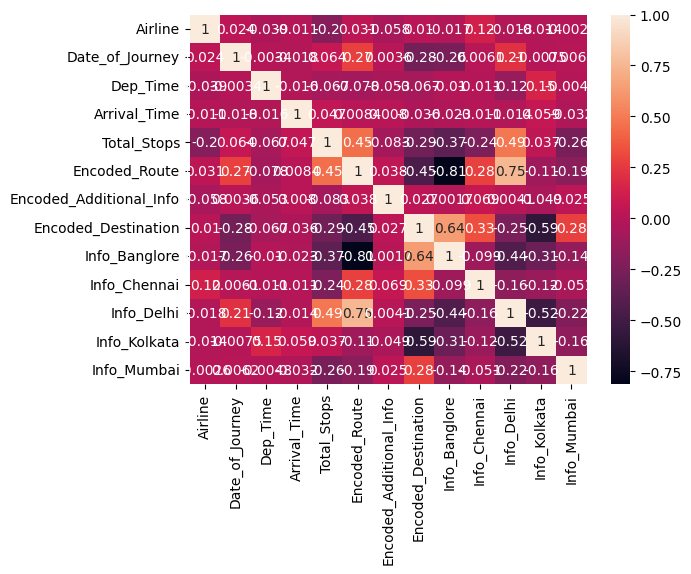

In [19]:
sns.heatmap(df.corr(), annot = True)

In [20]:
# Importing the test_data dataframe to predict a set of labels based on test_data

df2 = pd.read_csv('test_data.csv')

In [21]:
#

df2['Encoded_Route'] = encoder.fit_transform(df2['Route'])
df2['Encoded_Additional_Info'] = encoder.fit_transform(df2['Additional_Info'])
df2['Encoded_Destination'] = encoder.fit_transform(df2['Destination'])
df2['Airline'] = encoder.fit_transform(df2['Airline'])
df2['Date_of_Journey'] = encoder.fit_transform(df2['Date_of_Journey'])
df2['Dep_Time'] = encoder.fit_transform(df2['Dep_Time'])
df2['Arrival_Time'] = encoder.fit_transform(df2['Arrival_Time'])

stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

# Apply the mapping to the 'Total_Stops' column
df2['Total_Stops'] = df2['Total_Stops'].map(stop_mapping)

# Perform one-hot encoding on the 'Source' column
Source = pd.get_dummies(df2['Source'], prefix='Info')

# Concatenate the encoded source column with the original dataframe
df2 = pd.concat([df2, Source], axis=1)

# Drop the original 'Source' column
df2.drop('Source', axis=1, inplace=True)

#convert the true's and False's to 1's and 0's. 
df2['Info_Banglore'] = df2['Info_Banglore'].replace({True: 1, False: 0})
df2['Info_Chennai'] = df2['Info_Chennai'].replace({True: 1, False: 0})
df2['Info_Delhi'] = df2['Info_Delhi'].replace({True: 1, False: 0})
df2['Info_Kolkata'] = df2['Info_Kolkata'].replace({True: 1, False: 0})
df2['Info_Mumbai'] = df2['Info_Mumbai'].replace({True: 1, False: 0})

#Drop the following columns
df2 = df2.drop(['Destination'], axis=1)
df2 = df2.drop(['Route'], axis=1)
df2 = df2.drop(['Additional_Info'], axis=1)


/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/1266148368.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Info_Banglore'] = df2['Info_Banglore'].replace({True: 1, False: 0})
/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/1266148368.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Info_Chennai'] = df2['Info_Chennai'].replace({True: 1, False: 0})
/var/folders/tz/8s9ky1451fxdd68ykql0n2880000gn/T/ipykernel_1670/1266148368.py:28: FutureWarning: Downcasting behavior in `replace` is de

In [22]:
df3 = pd.read_csv('train_labels.csv')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
df_filled = df.fillna(df.mean())

In [25]:
df.isnull().sum()

Airline                    0
Date_of_Journey            0
Dep_Time                   0
Arrival_Time               0
Total_Stops                1
Encoded_Route              0
Encoded_Additional_Info    0
Encoded_Destination        0
Info_Banglore              0
Info_Chennai               0
Info_Delhi                 0
Info_Kolkata               0
Info_Mumbai                0
dtype: int64

In [26]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mean())

In [27]:
df.isnull().sum()

Airline                    0
Date_of_Journey            0
Dep_Time                   0
Arrival_Time               0
Total_Stops                0
Encoded_Route              0
Encoded_Additional_Info    0
Encoded_Destination        0
Info_Banglore              0
Info_Chennai               0
Info_Delhi                 0
Info_Kolkata               0
Info_Mumbai                0
dtype: int64

In [28]:
train_x = df
test_x = df
train_y = df3
test_y = df3

In [29]:
#This code regularizes the whole data 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [30]:
import numpy as np

In [33]:
reg = LinearRegression()
reg.fit(train_x, train_y)
np.sqrt(mean_squared_error(test_y, reg.predict(test_x)))

4.385335707767659

In [35]:
# Using Lasso techinique to regularize the model. 

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(train_x, train_y)
np.sqrt(mean_squared_error(test_y, lasso.predict(test_x)))

4.38517191190555

In [681]:
from sklearn.model_selection import GridSearchCV

param = {'alpha': [1e-3, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
reg = GridSearchCV(lasso, param, scoring = 'neg_mean_squared_error',cv =5 )
reg.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [674]:
reg.best_estimator_

Lasso(alpha=0.001)